# Practica 08
### Práctica en el uso de librerías para el análisis estadístico avanzado a través de las medidas de tendencia central (Media, Moda, Mediana) , disperción (Varianza, Rango, Desviación Estándar, Rango Cuadrático - IQR, Percentiles) y distribución (Curtosis - Kurtosis y Asimetría - Skewness)


## Step 1: Libraries & Configurations

In [2]:
%%time

# Instalación e importación de bibliotecas necesarias:

from gc import collect  # Recolección de basura para liberar memoria
from warnings import filterwarnings  # Para manejar los mensajes de advertencia

import re  # Expresiones regulares para manejo de texto

import numpy as np  # Álgebra lineal y operaciones numéricas
import pandas as pd  # Procesamiento de datos y lectura de archivos CSV
from scipy import stats  # Funciones estadísticas

from itertools import cycle, combinations  # Generación de ciclos y combinaciones

import matplotlib.pyplot as plt  # Visualización de datos
from matplotlib.ticker import FuncFormatter  # Formato personalizado de los ejes
from matplotlib.ticker import FormatStrFormatter  # Formato con cadenas de texto
from mpl_toolkits.mplot3d import Axes3D  # Gráficas en 3D
from matplotlib.colors import ListedColormap  # Paletas de colores personalizadas
import seaborn as sns  # Visualización estadística avanzada
from wordcloud import WordCloud  # Nube de palabras para análisis de texto

from io import StringIO  # Lectura de cadenas como si fueran archivos

filterwarnings('ignore')  # Ignorar mensajes de advertencia

from IPython.display import display, HTML, display_html, clear_output  # Mostrar contenido en HTML en notebooks

# Limpiar la salida anterior del notebook
clear_output()

# Imprimir línea en blanco (opcional)
print()

# Recolectar memoria basura (limpieza de objetos no usados)
collect()



CPU times: total: 31.2 ms
Wall time: 389 ms


223

In [3]:
# Establecer los colores de letra para los mensajes
class color:
    GREEN = '\033[92m'  # Verde
    RED = '\033[91m'    # Rojo
    BLUE = '\033[94m'   # Azul
    BOLD = '\033[1m'    # Negrita
    END = '\033[0m'     # Reset

# Establecer estilo de gráficos
plt.style.use("fivethirtyeight")
sns.set(rc={"figure.figsize": (10, 10)})


 ## Step 2: Load Dataset

In [4]:
%%time


try:
    # Cargar el dataser
    df = pd.read_csv('salaries.csv')
    print(f"{color.GREEN}El dataset se cargó correctamente.{color.END}")
    
except FileNotFoundError:
    # Error en caso de no existir el archivo en esta misma carpeta
    print(f"{color.RED}Error: El archivo no fue encontrado por favor revisa la ubicación.{color.END}")

except Exception as e:
    # Otros errores
    print(f"{color.RED}Ocurrió un error mientras se cargaban los datos: {e}{color.END}")

print(color.BLUE)
collect();

El dataset se cargó correctamente.

CPU times: total: 31.2 ms
Wall time: 243 ms


In [5]:
def display_dataframe_with_custom_header(df, show_head=False):
    """
    Muestra un resumen del DataFrame con formato HTML.
    Si show_head=True, también muestra las primeras filas del DataFrame.
    """
    df.info()

    if show_head:
        print(f"\n{color.GREEN}🧾 Primeras filas del DataFrame:{color.END}")
        display(df.head())

## Step 3 | Attribute Overview

In [6]:
##Mostrar el dataframe creado(df)  # Mostrar su información
display_dataframe_with_custom_header(df, show_head=True)  # Display head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73159 entries, 0 to 73158
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           73157 non-null  float64
 1   experience_level    73157 non-null  object 
 2   employment_type     73154 non-null  object 
 3   job_title           73151 non-null  object 
 4   salary              73152 non-null  float64
 5   salary_currency     73152 non-null  object 
 6   salary_in_usd       73152 non-null  float64
 7   employee_residence  73154 non-null  object 
 8   remote_ratio        73150 non-null  float64
 9   company_location    73154 non-null  object 
 10  company_size        73154 non-null  object 
dtypes: float64(4), object(7)
memory usage: 6.1+ MB

🧾 Primeras filas del DataFrame:


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,MUA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
3,NaN,MUA,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
4,2025.0,SE,FT,Engineer,143000.0,USD,143000.0,US,0.0,US,M


## Step 4 | Missing Value Handling


In [7]:
def plot_missing_values_heatmap(df):
    # Contar los valores nulos por columna
    missing_counts = df.isnull().sum()
    missing_counts = missing_counts[missing_counts > 0]  # Solo columnas con nulos

    if missing_counts.empty:
        print("✅ No hay valores nulos en el DataFrame.")
        return

    # Estilo gráfico
    sns.set(style="whitegrid")

    # Crear la gráfica
    plt.figure(figsize=(12, 6))
    bars = sns.barplot(
        x=missing_counts.index,
        y=missing_counts.values,
        palette="Blues_d"
    )

    # Etiquetas de cantidad arriba de cada barra
    for i, value in enumerate(missing_counts.values):
        plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

    plt.title("Valores Nulos por Columna")
    plt.xlabel("Columnas")
    plt.ylabel("Cantidad de Valores Nulos")
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas si son muchas
    plt.tight_layout()
    plt.show()

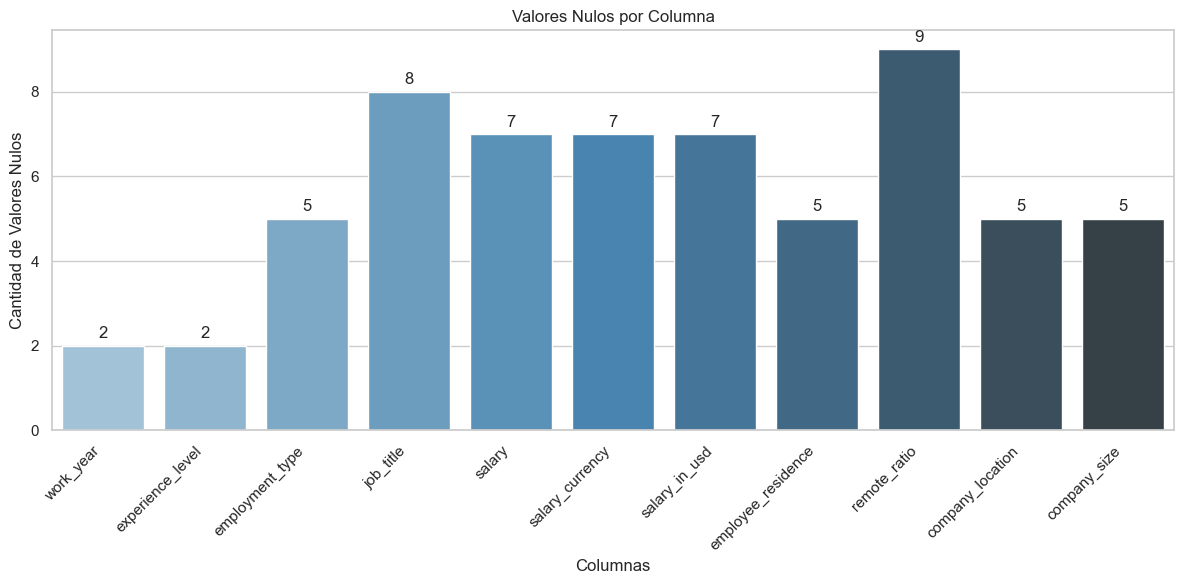

In [8]:
plot_missing_values_heatmap(df)

## Step 5 | Duplicate Value Manage

In [9]:
# Revisando los duplicados en los datos
duplicate_values = df.duplicated().sum()
print(color.BLUE + f'El dataset contiene  {color.BOLD + color.RED}{duplicate_values}{color.END} {color.BLUE}valores nulos')

# Quitar los valores duplicados
df_no_duplicates = df.drop_duplicates()

El dataframe contiene 39124 valores duplicados


In [10]:
# Crear diccionario: True si la columna NO tiene duplicados, False si sí tiene
sin_duplicados = {
    columna: df[columna].duplicated().sum() == 0
    for columna in df.columns
}

# Convertir a DataFrame
df_sin_duplicados = pd.DataFrame.from_dict(sin_duplicados, orient='index', columns=['0'])

# Mostrar como tabla estilizada con colores (verde si True, rojo si False)
df_sin_duplicados.style.applymap(lambda x: 'color: red' if x else 'color: green')

,0
work_year,False
experience_level,False
employment_type,False
job_title,False
salary,False
salary_currency,False
salary_in_usd,False
employee_residence,False
remote_ratio,False
company_location,False


In [11]:
def calculate_statistics(df, opacity=1.0, font_size='16px'):
    # Columnas numéricas que deseas analizar
    numeric_cols = ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']

    # Diccionario para almacenar estadísticas por estadística (fila)
    stats = {
        'mean': [],
        'median': [],
        'mode': [],
        'range': [],
        'stdev': [],
        'variance': [],
        'iqr': [],
        '25%': [],
        '50%': [],
        '75%': [],
        'min': [],
        'max': [],
        'skewness': [],
        'kurtosis': []
    }

    for col in numeric_cols:
        series = df[col].dropna()

        stats['mean'].append(series.mean())
        stats['median'].append(series.median())
        stats['mode'].append(series.mode().iloc[0] if not series.mode().empty else None)
        stats['range'].append(series.max() - series.min())
        stats['stdev'].append(series.std())
        stats['variance'].append(series.var())
        stats['iqr'].append(series.quantile(0.75) - series.quantile(0.25))
        stats['25%'].append(series.quantile(0.25))
        stats['50%'].append(series.quantile(0.5))
        stats['75%'].append(series.quantile(0.75))
        stats['min'].append(series.min())
        stats['max'].append(series.max())
        stats['skewness'].append(series.skew())
        stats['kurtosis'].append(series.kurt())

    # Crear DataFrame con las estadísticas como filas y las columnas del dataset como columnas
    stats_df = pd.DataFrame(stats, index=numeric_cols).T

    # Estilo visual
    styled = stats_df.style.set_table_attributes(f'style="opacity: {opacity}; font-size: {font_size};"')\
                            .format(precision=2)\
                            .set_caption("Estadísticas descriptivas por columna")

    return styled


In [12]:
# Ejecutar la función
stats_df = calculate_statistics(df, opacity=0.9, font_size='14px')
stats_df


,work_year,salary,salary_in_usd,remote_ratio
mean,2023.83,162547.28,158007.84,21.58
median,2024.00,148000.00,147500.00,0.00
mode,2024.00,160000.00,160000.00,0.00
range,6.00,30386000.00,785000.00,100.00
stdev,0.48,192572.20,72502.53,41.02
variance,0.23,37084051453.28,5256617442.86,1682.86
iqr,0.00,93102.50,92825.00,0.00
25%,2024.00,106897.50,106875.00,0.00
50%,2024.00,148000.00,147500.00,0.00
75%,2024.00,200000.00,199700.00,0.00
